# Review Data EDA

In [1]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from glob import glob

import seaborn as sns
sns.set_style('whitegrid')
sns.set_context("poster")

In [2]:
def time_marker(text=''):
    print('[{}] {}'.format(datetime.datetime.now().time(), text))

In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

import matplotlib
font = {'size' : 50}
matplotlib.rc('font', **font)

TITLE_FONT_SIZE = 25
LABEL_FONT_SIZE = 15
TICK_FONT_SIZE  = 15

FIG_SIZE = (15,6)
FIG_SIZE_SHORT = (15,3)
GRID_DIMS = 15

DO_WRITE_CHARTS = False

In [5]:
fname = '../clean_data/_analysis/us_restaurant_bids.txt'

with open(fname) as f:
    us_rest_bids = f.readlines()
us_rest_bids = [x.strip() for x in us_rest_bids] 

# Load Review Data for US Restaurants

In [7]:
time_marker(text='Loading Review Data...')

reviews = pd.DataFrame()
file_path_slug = '../clean_data/reviews/*.csv'
file_list = glob(file_path_slug)

# Chunk Settings
chunks = list()
chunksize = 10000
for ii, file in enumerate(sorted(file_list)):
    time_marker('Reading {} of {} {}...'.format(ii+1, len(file_list), file))
    num_chunks = math.ceil(sum(1 for row in open(file, 'r'))/chunksize)
    format_width = len(str(num_chunks))

    # import file in chunks
    for jj, chunk in enumerate(pd.read_csv(file, chunksize=chunksize, iterator=True, index_col=0, parse_dates=['date'])):

        # only consider reviews for businesses that are US Restaurants
        chunk = chunk[chunk.business_id.isin(us_rest_bids)].copy()
        
        # drop reviews with missing review text
        chunk = chunk[(~chunk.text.isnull()) & (~chunk.user_id.isnull())].copy()
        
        # append chunk to chunks list
        chunks.append(chunk)
        
time_marker(text='merging to dataframe...')
reviews = pd.concat(chunks)

time_marker('reseting index...')
reviews.reset_index(inplace=True, drop=True)
time_marker(text='Complete!')


[15:35:33.245096] Loading Review Data...
[15:35:33.247782] Reading 1 of 64 ../clean_data/reviews/00_-_reviews_clean.csv...
[15:35:34.711465] Reading 2 of 64 ../clean_data/reviews/01_0_reviews_clean.csv...
[15:35:36.117046] Reading 3 of 64 ../clean_data/reviews/02_1_reviews_clean.csv...
[15:35:37.239338] Reading 4 of 64 ../clean_data/reviews/03_2_reviews_clean.csv...
[15:35:38.356786] Reading 5 of 64 ../clean_data/reviews/04_3_reviews_clean.csv...
[15:35:39.665473] Reading 6 of 64 ../clean_data/reviews/05_4_reviews_clean.csv...
[15:35:40.897297] Reading 7 of 64 ../clean_data/reviews/06_5_reviews_clean.csv...
[15:35:42.189881] Reading 8 of 64 ../clean_data/reviews/07_6_reviews_clean.csv...
[15:35:43.427410] Reading 9 of 64 ../clean_data/reviews/08_7_reviews_clean.csv...
[15:35:44.689220] Reading 10 of 64 ../clean_data/reviews/09_8_reviews_clean.csv...
[15:35:45.791816] Reading 11 of 64 ../clean_data/reviews/10_9_reviews_clean.csv...
[15:35:46.966700] Reading 12 of 64 ../clean_data/review

In [8]:
reviews['date'] = pd.to_datetime(reviews['date'])

reviews['cool']             = reviews['cool'].astype(int)
reviews['funny']            = reviews['funny'].astype(int)
reviews['stars']            = reviews['stars'].astype(int)

reviews['useful'].fillna(0, inplace=True)
reviews['useful']           = reviews['useful'].astype(int)

reviews['review_length']    = reviews['review_length'].astype(int)

In [9]:
reviews.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,review_length
0,-gTX7XKGOntF2FQ1EDxHpA,0,2016-07-21,0,8BJUlXtGvVpkNq663suBUw,1,went thru the drive thru and could hardly unde...,0,AKtCpeBdst-OFYNmsfJgiw,336
1,-gTX7XKGOntF2FQ1EDxHpA,1,2017-07-25,0,umGwYIfHbKjj5Tvi2o4Oog,1,everytime i come here something is wrong a few...,1,5vTqiawndUhSPAqDMhPr5Q,293
2,-gTX7XKGOntF2FQ1EDxHpA,1,2015-10-18,1,mjiQ2bNWFTbuzdQN0IVcJw,1,bad decision extra crispy was not rollsbiscui...,3,7-nbzoSmoMzwo2fbetoycQ,228
3,-gTX7XKGOntF2FQ1EDxHpA,0,2017-03-15,0,pH-8G3AXXqQ6FyTAMEYRmQ,1,walked in staff chateering since there was no ...,0,zy96ykN5Djp8-HoXTBtzJg,378
4,-luHD_D1L22l0rYvNWyWFQ,0,2014-12-19,0,IUENqKWGxon41TpqKq1DXw,5,the eggplant parmesan is fabulous my friend ...,0,DmUSvFMmj0ja8iz7xgPeqQ,191


In [10]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1323672 entries, 0 to 1323671
Data columns (total 10 columns):
business_id      1323672 non-null object
cool             1323672 non-null int64
date             1323672 non-null datetime64[ns]
funny            1323672 non-null int64
review_id        1323672 non-null object
stars            1323672 non-null int64
text             1323672 non-null object
useful           1323672 non-null int64
user_id          1323672 non-null object
review_length    1323672 non-null int64
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 101.0+ MB


In [12]:
for col in reviews.columns:
    print('{} unique {} values'.format(str(len(reviews[col].unique())).rjust(10), col.ljust(15)))

     19976 unique business_id     values
       118 unique cool            values
      4305 unique date            values
       102 unique funny           values
   1323672 unique review_id       values
         5 unique stars           values
   1323232 unique text            values
       127 unique useful          values
    496209 unique user_id         values
      4819 unique review_length   values


# Exploratory Data Analysis

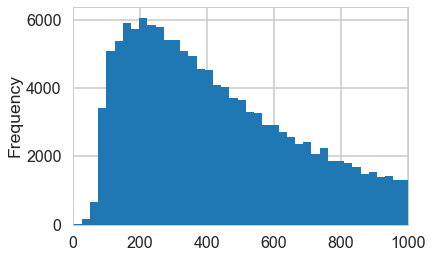

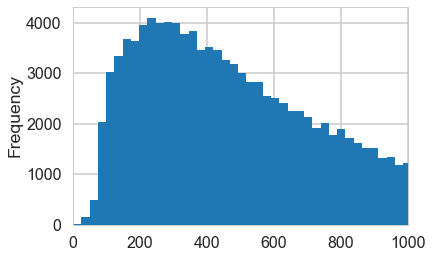

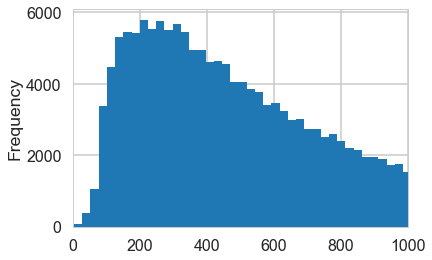

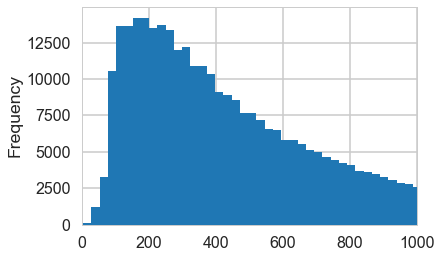

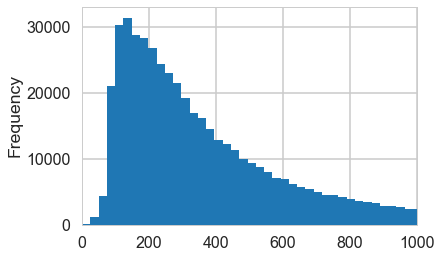

In [48]:
# reviews.groupby('stars')['review_length'].plot(kind='hist', bins=200, alpha=0.25)

for s in sorted(reviews.stars.unique()):
    reviews[reviews.stars == s]['review_length'].plot(kind='hist', bins=200)
    plt.xlim([0, 1000])
    plt.show()
    plt.close()